<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/Bose_Einstein_Condensate_Mercury_Inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

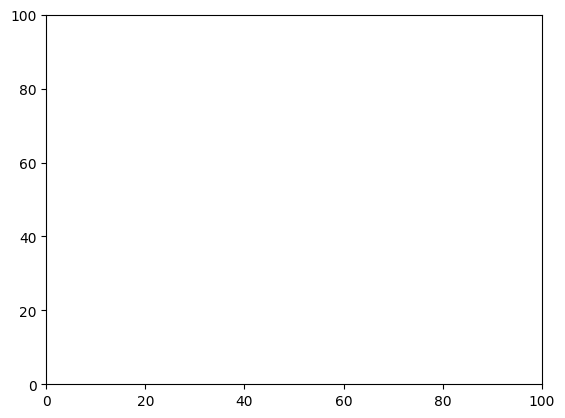

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Parameters
num_particles = 1000
temperature = 1.0
cooling_rate = 0.999
time_steps = 1000
grid_size = 100

# Initialize particle positions and momenta
positions = np.random.uniform(0, grid_size, (num_particles, 2))
momenta = np.random.normal(0, temperature, (num_particles, 2))

# Function to apply cooling
def apply_cooling(momenta, cooling_rate):
    return momenta * cooling_rate

# Function to update positions based on momenta
def update_positions(positions, momenta):
    return positions + momenta

# Function to check if a particle is in the BEC
def is_in_bec(momentum, threshold=0.1):
    return np.linalg.norm(momentum) < threshold

# Initialize plot
fig, ax = plt.subplots()
ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
scatter = ax.scatter([], [], s=1)

# Animation function
def animate(i):
    global positions, momenta, temperature

    # Apply cooling
    momenta = apply_cooling(momenta, cooling_rate)

    # Update positions
    positions = update_positions(positions, momenta)

    # Check for BEC formation
    bec_indices = [i for i, momentum in enumerate(momenta) if is_in_bec(momentum)]
    bec_positions = positions[bec_indices]

    # Update scatter plot
    scatter.set_offsets(positions)
    scatter.set_array(np.zeros(num_particles))  # Set color array for scatter plot

    # Highlight BEC particles
    if len(bec_positions) > 0:
        bec_scatter = ax.scatter(bec_positions[:, 0], bec_positions[:, 1], s=10, color='red')
        return scatter, bec_scatter
    else:
        return scatter,

# Create animation
ani = animation.FuncAnimation(fig, animate, frames=time_steps, interval=5, blit=False)

# Show plot
plt.show()
HTML(ani.to_html5_video()) # or
#display(HTML(ani.to_html5_video()))
